<H1> Baseline Model (VGG 3 Blocks) </H1>

We will begin with three basic VGG CNN layers, each followed by a max pooling layer. Max pooling efficiently reduces parameter size while preserving information. As usual in deep learning models, we will flatten the intermediate layer outputs and pass them to a dense network. The dense network output will then go to a final output layer with 10 units, corresponding to our 10 categories. We will use Softmax as the final activation to select the most probable class from the 10 categories.

<H1> Loading Libraries </H1>

In [1]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# visuals
import matplotlib.pyplot as plt

<H1> Download the CIFAR-10 dataset and save it into a specified directory </H1>

In [1]:
import os
from PIL import Image

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def save_images(data, labels, directory):
    os.makedirs(directory, exist_ok=True)
    for i in range(data.shape[0]):
        img = Image.fromarray(data[i])
        label = class_names[labels[i][0]]
        label_dir = os.path.join(directory, label)
        os.makedirs(label_dir, exist_ok=True)
        img.save(os.path.join(label_dir, f"{i}.png"))

In [9]:
# Ensure the save directory exists
save_dir = 'C:/home/dataset/upi/cifar10'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

save_images(x_train, y_train, os.path.join(save_dir, 'train'))
save_images(x_test, y_test, os.path.join(save_dir, 'test'))

print(f"CIFAR-10 images downloaded and saved to {save_dir}")


CIFAR-10 images downloaded and saved to C:/home/dataset/upi


<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [2]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [3]:
train_dir = "C:/home/dataset/upi/cifar10/train"
val_dir = "C:/home/dataset/upi/cifar10/train"
test_dir = "C:/home/dataset/upi/cifar10/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True
)

# Only rescale for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches
validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow validation images in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=1,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


<H1> Model Architecture: </H1>

Conv2D layers extract features from the images using 32 and 64 filters.
MaxPooling2D layers reduce the spatial dimensions.
Flatten layer converts the 2D feature maps to a 1D vector.
Dense layers perform classification, with the final layer using softmax activation to output probabilities for the 10 classes.

In [5]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.Dense(10, activation='softmax'))

In [17]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

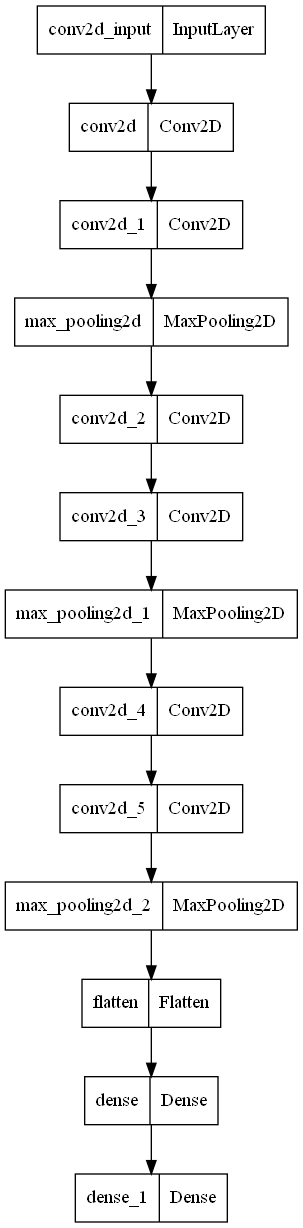

In [18]:
plot_model(simple_model)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [6]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(train_generator, 
                            validation_data=validation_generator, 
                            epochs=EPOCHS, 
                            # batch_size=BATCH_SIZE
                            )


Epoch 1/50
782/782 [==============================] - 507s 642ms/step - loss: 1.5364 - accuracy: 0.4347 - val_loss: 1.1895 - val_accuracy: 0.5678
Epoch 2/50
782/782 [==============================] - 36s 46ms/step - loss: 1.0517 - accuracy: 0.6272 - val_loss: 0.8890 - val_accuracy: 0.6881
Epoch 3/50
782/782 [==============================] - 37s 48ms/step - loss: 0.8229 - accuracy: 0.7096 - val_loss: 0.7348 - val_accuracy: 0.7423
Epoch 4/50
782/782 [==============================] - 40s 51ms/step - loss: 0.6965 - accuracy: 0.7561 - val_loss: 0.5963 - val_accuracy: 0.7930
Epoch 5/50
782/782 [==============================] - 40s 51ms/step - loss: 0.5985 - accuracy: 0.7927 - val_loss: 0.5577 - val_accuracy: 0.8067
Epoch 6/50
782/782 [==============================] - 38s 49ms/step - loss: 0.5328 - accuracy: 0.8127 - val_loss: 0.4395 - val_accuracy: 0.8441
Epoch 7/50
782/782 [==============================] - 79s 101ms/step - loss: 0.4690 - accuracy: 0.8364 - val_loss: 0.3614 - val_accura

In [7]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

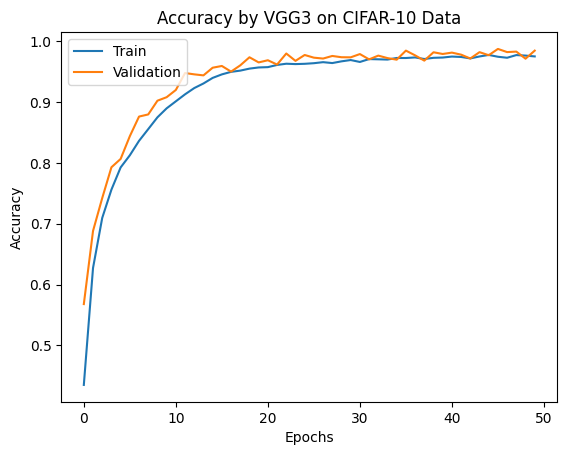

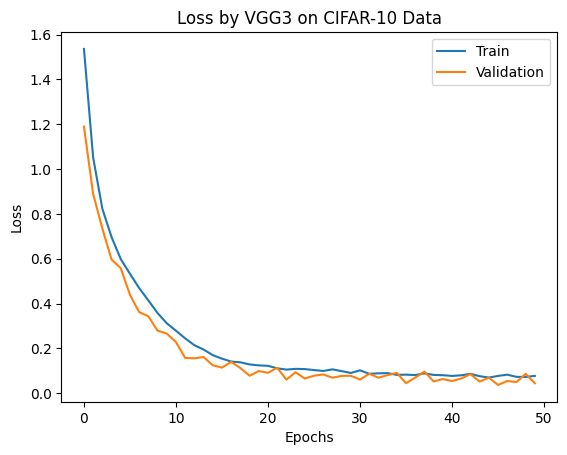

In [8]:
myplot(hist_train)

In [11]:
simple_model.evaluate(test_generator)

10000/10000 [==============================] - 38s 4ms/step - loss: 1.5741 - accuracy: 0.7728


[1.5741385221481323, 0.7728000283241272]

<H1> Save the train model </H1>

In [12]:
simple_model.save('C:/home/azizi/upi/models/simple_model_base.h5')

<H1> Load the existing model </H1>

In [13]:
from keras.models import load_model

In [14]:
saved_model = load_model('C:/home/azizi/upi/models/simple_model_base.h5')

<H1> Re-evaluate the model </H1>

In [15]:
score = saved_model.evaluate(test_generator)

10000/10000 [==============================] - 18s 2ms/step - loss: 1.5741 - accuracy: 0.7728


<H1> Test the model from a file </H1>

In [25]:
# CIFAR-10 class names
def convert_index_to_label(index):
    labels = {
        0: "airplane",
        1: "automobile",
        2: "bird",
        3: "cat",
        4: "deer",
        5: "dog",
        6: "frog",
        7: "horse",
        8: "ship",
        9: "truck"
    }

    return labels.get(index, "Unknown")

1/1 [==============================] - 0s 3ms/step
[[9.13486474e-12 1.26987256e-14 6.10761752e-09 1.76588946e-04
  5.75460494e-04 9.99160767e-01 1.09529465e-05 7.62408235e-05
  2.05003264e-10 2.49462885e-12]]
5
Predicted: dog


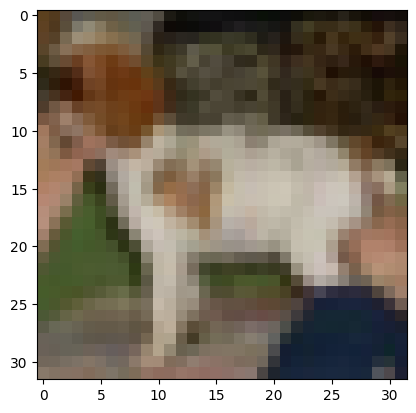

In [32]:
import keras.utils as image
import numpy as np

img = image.load_img('C:/home/dataset/upi/cifar10/test/dog/12.png',target_size=(32,32))
img = np.asarray(img) / 255
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = saved_model.predict(img)
print(output)

for i, result in enumerate(output, start=1):
    label_index = np.argmax(result)
    print(label_index)
    print('Predicted: ' + str(convert_index_to_label(label_index)))